In [117]:
import numpy as np
import pandas as pd

In [118]:
df = pd.read_csv('grades.csv')
df.head(10)

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49
5,https://ckd.upgrad.com/UpGrad/0ab308ab-2b3a-4c...,01/04/17-02:43:46
6,https://ckd.upgrad.com/UpGrad/ba2c249c-dac8-46...,01/03/17-23:41:25
7,https://ckd.upgrad.com/UpGrad/d8969806-6760-44...,01/09/17-23:49:09
8,https://ckd.upgrad.com/UpGrad/5ff1d0ab-816b-48...,12/30/16-14:14:17
9,https://ckd.upgrad.com/UpGrad/0d507851-d102-47...,01/03/17-21:18:04


In [119]:
df['submit_time'] = pd.to_datetime(df['submit_time'])

# extract year, month, day, hour, minute and second as separate columns
df['submit_time'] = pd.to_datetime(df['submit_time'], format='%m/%d/%y-%H:%M:%S')
df['hour_12'] = df['submit_time'].dt.strftime('%I:%M:%S %p')
df['hour'] = df['submit_time'].dt.hour
df['year'] = df['submit_time'].dt.year
df['month'] = df['submit_time'].dt.month
df['day'] = df['submit_time'].dt.day
df['second'] = df['submit_time'].dt.second

df.head()

,submission,submit_time,hour_12,hour,year,month,day,second
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,08:28:52 PM,20,2017,1,3,52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,08:18:21 PM,20,2017,1,3,21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,10:37:08 PM,22,2017,1,3,8
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,09:43:19 PM,21,2017,1,2,19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,03:27:49 PM,15,2017,1,3,49


In [120]:
df['submission'].head()

0    https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...
1    https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...
2    https://ckd.upgrad.com/UpGrad/a353d129-c100-43...
3    https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...
4    https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...
Name: submission, dtype: object

In [121]:
df['submission_type'] = df['submission'].str.split('/').str[-1]

In [122]:
df.head()

,submission,submit_time,hour_12,hour,year,month,day,second,submission_type
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,08:28:52 PM,20,2017,1,3,52,DDA1610095.zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,08:18:21 PM,20,2017,1,3,21,DDA1610288.zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,10:37:08 PM,22,2017,1,3,8,DDA1610106.zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,09:43:19 PM,21,2017,1,2,19,DDA1610261.zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,03:27:49 PM,15,2017,1,3,49,DDA1610028.zip


In [123]:
ending = ['zip']
mapper = {True: 'Y', False: 'N'}
df['zip_type'] = df['submission_type'].str[-3:].isin(ending).map(mapper)

In [124]:
df.head()

,submission,submit_time,hour_12,hour,year,month,day,second,submission_type,zip_type
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,08:28:52 PM,20,2017,1,3,52,DDA1610095.zip,Y
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,08:18:21 PM,20,2017,1,3,21,DDA1610288.zip,Y
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,10:37:08 PM,22,2017,1,3,8,DDA1610106.zip,Y
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,09:43:19 PM,21,2017,1,2,19,DDA1610261.zip,Y
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,03:27:49 PM,15,2017,1,3,49,DDA1610028.zip,Y


In [125]:
df.tail()

,submission,submit_time,hour_12,hour,year,month,day,second,submission_type,zip_type
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,2017-01-03 22:43:12,10:43:12 PM,22,2017,1,3,12,DDA1610228.zip,Y
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,2017-01-09 23:59:34,11:59:34 PM,23,2017,1,9,34,DDA1610200.zip,Y
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,2016-12-19 21:44:13,09:44:13 PM,21,2016,12,19,13,DDA1610183.zip,Y
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,2017-01-09 23:23:06,11:23:06 PM,23,2017,1,9,6,DDA1610013.R,N
197,https://ckd.upgrad.com/UpGrad/21da378c-75a4-4a...,2017-01-03 22:32:38,10:32:38 PM,22,2017,1,3,38,DDA1610048.zip,Y


In [126]:
zip_count = df[df['zip_type'] == 'Y'].shape[0]
total_count = df.shape[0]
percentage = (zip_count / total_count) * 100
percentage

95.45454545454545

In [127]:
df.columns

Index(['submission', 'submit_time', 'hour_12', 'hour', 'year', 'month', 'day',
       'second', 'submission_type', 'zip_type'],
      dtype='object')

In [128]:
df.hour_12.dtype

dtype('O')

In [129]:
df['submit_time'] = pd.to_datetime(df['submit_time'], format='%I:%M:%S %p')

In [130]:
df.head()

,submission,submit_time,hour_12,hour,year,month,day,second,submission_type,zip_type
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,08:28:52 PM,20,2017,1,3,52,DDA1610095.zip,Y
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,08:18:21 PM,20,2017,1,3,21,DDA1610288.zip,Y
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,10:37:08 PM,22,2017,1,3,8,DDA1610106.zip,Y
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,09:43:19 PM,21,2017,1,2,19,DDA1610261.zip,Y
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,03:27:49 PM,15,2017,1,3,49,DDA1610028.zip,Y


In [131]:
filtered_df = df[df['submit_time'] > pd.to_datetime('Jan 3, 2017 - 11:59:59 PM', format='%b %d, %Y - %I:%M:%S %p')]
filtered_df.shape

(44, 10)

2017-01-04 312

2017-01-09 533

2017-01-02 504

2017-01-03 3584

In [133]:
grouped_data = df.groupby(["year","month","day"]).sum()
grouped_data.sort_values

C:\Users\raghu\AppData\Local\Temp\ipykernel_20340\1617526984.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(["year","month","day"]).sum()


<bound method DataFrame.sort_values of                 hour  second
year month day              
2016 11    19     15      52
     12    19     21      13
           21     16       7
           28     34     109
           29     23      91
           30     93     172
           31      0      21
2017 1     1      99     102
           2     258     504
           3    2395    3584
           4      19     312
           6      20      29
           7      33      87
           8      66      75
           9     419     533
           10      2     118
           17     13      23
     2     3       4      28>

In [137]:
hour_counts = df['hour'].value_counts()

# Determine which hour has the highest count
most_common_hour = hour_counts.idxmax()
most_common_hour

23

If you plot the distribution of submissions by the hour, what can you observe?


Most people submit the assignment in the late evening (i.e. after 8 PM)

Most people submit the assignment in the afternoon (i.e. 12 noon - 4 PM)

Most people submit the assignment in the morning (i.e. 8 AM -11 AM)

Submissions are distributed evenly across hours of the day

C:\Users\raghu\AppData\Local\Temp\ipykernel_20340\1777019426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hour'])


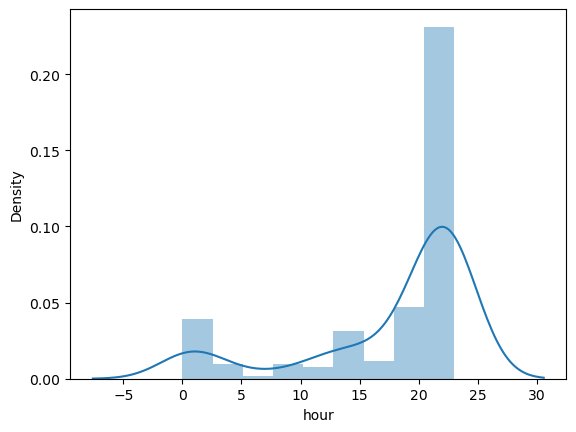

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['hour'])
plt.show()
